<a href="https://colab.research.google.com/github/ketki000/Mini-Project/blob/master/covid3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import shutil

# Deep learning
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math

In [5]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
PATH = '/content/drive/MyDrive/RRCAT Internship/COVID_dataset/COVID-19_Radiography_Dataset/'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH,'test')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:

#loading train dataset
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 14839 files belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_images = 14839
valid_images = 3267
test_images = 3089
BATCH_SIZE = 32

In [ ]:
len(train_dataset)   # 14839/32 batches

464

In [ ]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 3267 files belonging to 2 classes.


In [ ]:
test_dataset = image_dataset_from_directory(test_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 3089 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names
class_names

['disease', 'normal']

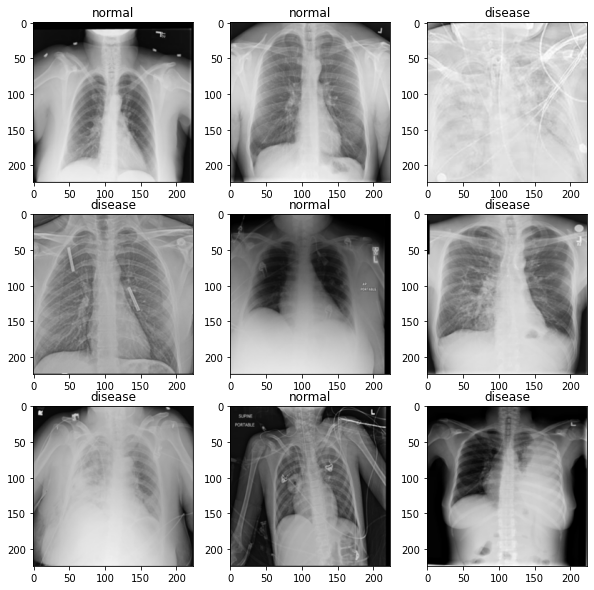

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
val_batches

<tf.Tensor: shape=(), dtype=int64, numpy=103>

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 103
Number of test batches: 97


In [ ]:
#Using ImageDataGenerator for training and validation data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  #rescale = 1./255,
                                  zoom_range = 0.2,
                                  height_shift_range=0.1,
                                  width_shift_range=0.1,
                                shear_range=10.0,
                                #zoom_range=[0.5, 1.5],
                                preprocessing_function=preprocess_input         
                               )
# Create Image Data Generator for Validation Set
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input )

In [ ]:
train_generator = image_gen.flow_from_directory(
      train_dir,
      target_size=IMG_SIZE,
      class_mode='binary',
      batch_size=BATCH_SIZE,
      )

Found 14839 images belonging to 2 classes.


In [ ]:
valid_generator = test_data_gen.flow_from_directory(
      validation_dir,
      target_size=IMG_SIZE,
      class_mode='binary', 
      batch_size=BATCH_SIZE,
      )

Found 3267 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'disease': 0, 'normal': 1}

In [ ]:
x,y = next(train_generator)
print("x ", type(x))
print("y ", type(y))
print("x ", x.shape)
print("y ", y.shape)

x  <class 'numpy.ndarray'>
y  <class 'numpy.ndarray'>
x  (32, 224, 224, 3)
y  (32,)


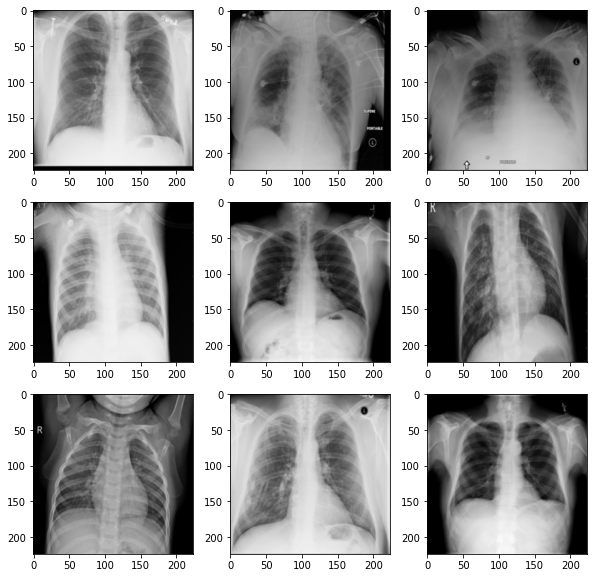

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
import pandas as pd
from matplotlib.pyplot import imread
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras

In [ ]:
num_classes=2
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
# create the base pre-trained model
base_model = InceptionV3(input_shape=IMG_SHAPE,weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
IMG_SHAPE

(224, 224, 3)

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
# let's add a fully-connected layer
x = Dense(4096, activation='relu')(x)
# and a logistic layer -- let's say we have 2 classes
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_images//BATCH_SIZE,
    epochs=5,
    validation_data=valid_generator,
    validation_steps=valid_images//BATCH_SIZE
    )

Epoch 1/5
463/463 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.7830

In [ ]:
# direct evaluating test dataset without IDG 
initial_epochs = 10
#loss, accuracy = model.evaluate(test_dataset)

test_score = model.evaluate(preprocess_input(test_dataset))

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

NameError: ignored

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

print(target_names)

['disease', 'normal']


In [ ]:
Y_pred = model.predict(valid_generator, valid_images // BATCH_SIZE+1)


KeyboardInterrupt: ignored

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))


In [ ]:
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))